In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("Automobile.csv")

In [3]:
df = df[["horsepower", "weight"]] 

In [4]:
df

,horsepower,weight
0,130.0,3504
1,165.0,3693
2,150.0,3436
3,150.0,3433
4,140.0,3449
...,...,...
393,86.0,2790
394,52.0,2130
395,84.0,2295
396,79.0,2625


In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df.head()

,horsepower,weight
0,130.0,3504
1,165.0,3693
2,150.0,3436
3,150.0,3433
4,140.0,3449


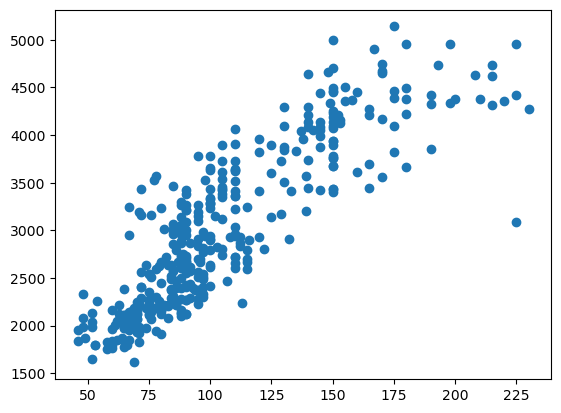

In [7]:
## scatter plot
plt.scatter(df['horsepower'],df['weight'])
plt.show()

In [8]:
## correlation
df.corr()

,horsepower,weight
horsepower,1.000000,0.864538
weight,0.864538,1.000000


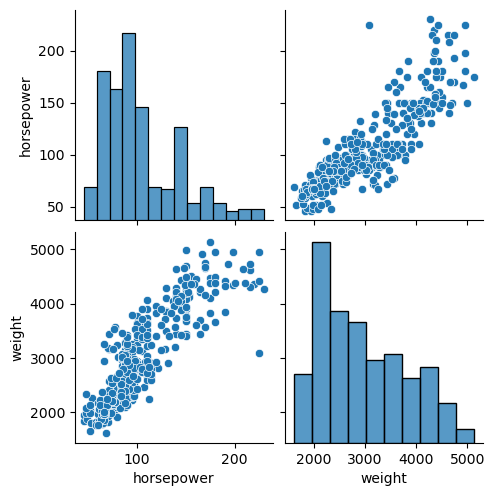

In [9]:
## seaborn for visualiation
import seaborn as sns
sns.pairplot(df)
plt.show()


In [10]:
## create independent and dependent fratures
x=df[['horsepower']] ## independent features should be data frame or 2d array
#np.array(x).shape
y=df['weight'] ##this variable can be inseries form or 1D array

In [13]:
np.array(y).shape

(398,)

In [22]:
## see this
#x_series=df['horsepower']
#np.array(x).shape

(398,)

In [30]:
x.head()

,horsepower
0,130.0
1,165.0
2,150.0
3,150.0
4,140.0


In [29]:
y.head()

0    3504
1    3693
2    3436
3    3433
4    3449
Name: weight, dtype: int64

In [16]:
## Train and Test split
from sklearn.model_selection import train_test_split

In [58]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.25)## split array or matrics into random train and test subsets

In [19]:
x_train.shape

(298, 1)

## standradization search on sklearn standard scalar
## z score = x-u/standard deviation  ==> u=0 and sd=1

In [24]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)

In [27]:
x_test=scaler.transform(x_test)

C:\Users\Nisha\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [28]:
## apply linear regression
from sklearn.linear_model import LinearRegression

In [37]:
regression=LinearRegression()
#x_train=x_train.dropna()
#y_train=y_train.loc[x_train.index]
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")   # or "median", "most_frequent"
x_train = imputer.fit_transform(x_train)
x_test  = imputer.transform(x_test)

regression.fit(x_train,y_train)

LinearRegression()

In [39]:
print('cofficient or slop:',regression.coef_)
print('intercept:',regression.intercept_)
## one unit moment in y axis leads to 746 moment in x axis.
## 2968 is the point where your line is meeting y aixs

cofficient or slop: [746.83412263]
intercept: 2968.536912751678


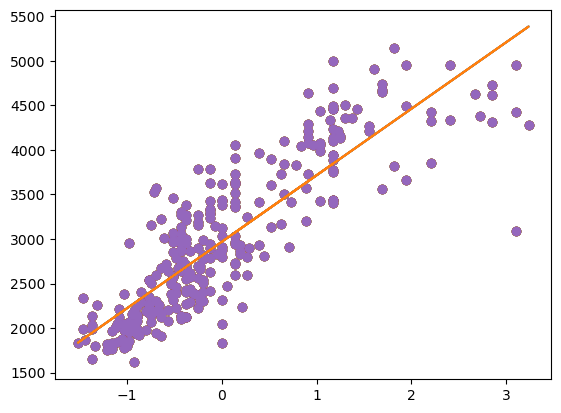

In [47]:
## plot trainig data ... plot best fit line
plt.scatter(x_train,y_train)
plt.plot(x_train, regression.predict(x_train))
plt.show()

PREDICTIONN OF TEST DATA
1.predicted horsepower output=intercept= coef(weight)
2. y_pred_test=2969+746(x_test)

In [57]:
## predictiioon for the test data
y_pred= regression.predict(x_test)

In [60]:
## performance matrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mas=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mas)
print(rmse)
 

5048357.10057745
2074.2496685739475
2246.854935365755


R squared:
R^2=1-SSR/SST
R^2 =coefficient of determination
SSR= sum of square of residuals
SST= toatal sum of squares

In [62]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print(score)

-5.768794441869288


Adjusted R2=1-[(1-R2)*(n-1)/(n-k-1)]
R2 = the R2 of the model
n= the numner of observations
k=the number of predicted variables

In [64]:
# display od adjusted R2
1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

-5.83786377290877

## OSL linear regression model

In [67]:
import statsmodels.api as sm
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")   # or "median", "most_frequent"
x_train = imputer.fit_transform(x_train)
x_test  = imputer.transform(x_test)
model =sm.OLS(y_train,x_train).fit() #endog = a 1-D endogenous response variable . the dependent variable
# exog = array like (a nobs x k array) where nobs :the numbe r of observation and k:the number of regressors

In [69]:
prediction= model.predict(x_test)
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 weight   R-squared (uncentered):                   0.968
Model:                            OLS   Adj. R-squared (uncentered):              0.968
Method:                 Least Squares   F-statistic:                              8928.
Date:                Sun, 28 Sep 2025   Prob (F-statistic):                   1.20e-223
Time:                        12:31:31   Log-Likelihood:                         -2305.4
No. Observations:                 298   AIC:                                      4613.
Df Residuals:                     297   BIC:                                      4616.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [75]:
## prediction for new data
new=[[146]]
scaled_value=scaler.transform(new)
prediction=regression.predict(scaled_value)## weight is 146
print(prediction)

[3765.03350896]


C:\Users\Nisha\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
